In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
data = pd.read_csv('data/german_credit_data.csv')

In [4]:
data.head()

,ID,Name,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,Amall Leingang,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,Marelda Knoebel,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,Adalhard Sautter,49,male,1,own,little,NaN,2096,12,education,good
3,3,Wilmot Natter,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,Bronson Strehle,53,male,2,free,little,little,4870,24,car,bad


In [5]:
data = data.drop(columns=["Name", "ID"])

In [6]:
data.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
data = data.fillna('missing')

In [8]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,missing,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,missing,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,missing,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,missing,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [9]:
for column in ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose", "Risk"]:
    data[column] = data[column].astype('category').cat.codes

In [10]:
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,1,0,1169,6,5,1
1,22,0,2,1,0,2,5951,48,5,0
2,49,1,1,1,0,1,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,1,1736,12,4,1
996,40,1,3,1,0,0,3857,30,1,1
997,38,1,2,1,0,1,804,12,5,1
998,23,1,2,0,0,0,1845,45,5,0


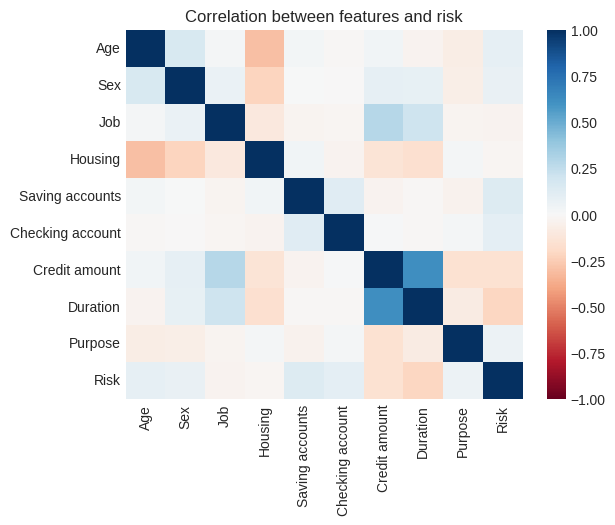

In [11]:
sns.heatmap(data.corr(numeric_only=False), cmap="RdBu", vmin=-1)
plt.title("Correlation between features and risk")
plt.savefig('plots/correlation.svg', transparent=True)
plt.show()

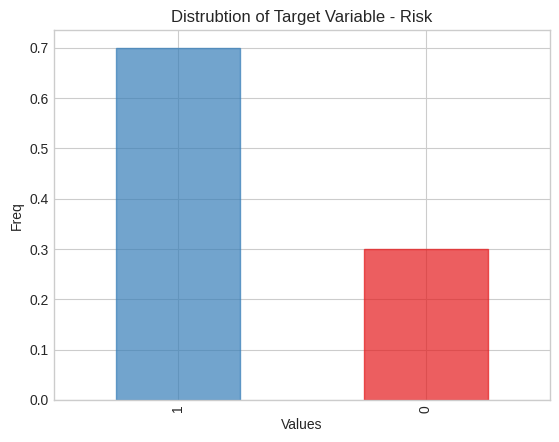

In [12]:
ax = data.Risk.value_counts(normalize=True).plot(kind='bar',title='Distrubtion of Target Variable - Risk', alpha=0.7);
ax.get_children()[0].set_color("#377eb8")
ax.get_children()[1].set_color("#e41a1c")
plt.xlabel('Values');
plt.ylabel('Freq');
plt.savefig('plots/risk.svg', transparent=True)
plt.show()

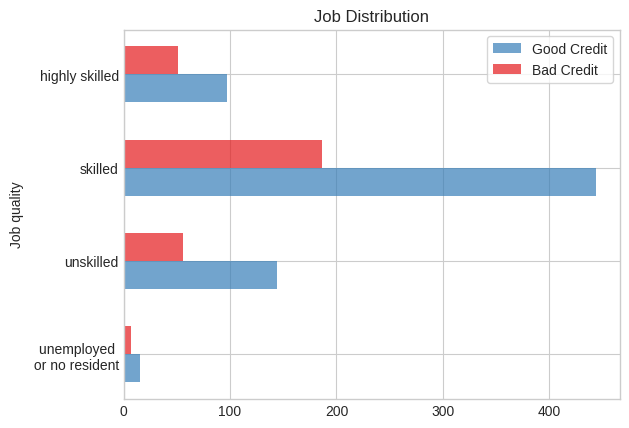

In [13]:
risk = data.groupby(["Job", "Risk"]).size().unstack()

plt.barh(np.arange(4), risk[1], height=0.3, color="#377eb8", alpha=0.7, label="Good Credit")
plt.barh(np.arange(4) + 0.3, risk[0], height=0.3, color= "#e41a1c", alpha=0.7, label="Bad Credit")

plt.title("Job Distribution")
plt.ylabel("Job quality")
plt.yticks(np.arange(4) + 0.15, labels=['unemployed \n or no resident', 'unskilled', 'skilled', 'highly skilled'])
# plt.xticks(np.linspace(0, 450, 10))

plt.legend(frameon=True)
plt.savefig('plots/jobs.svg', transparent=True)
plt.show()

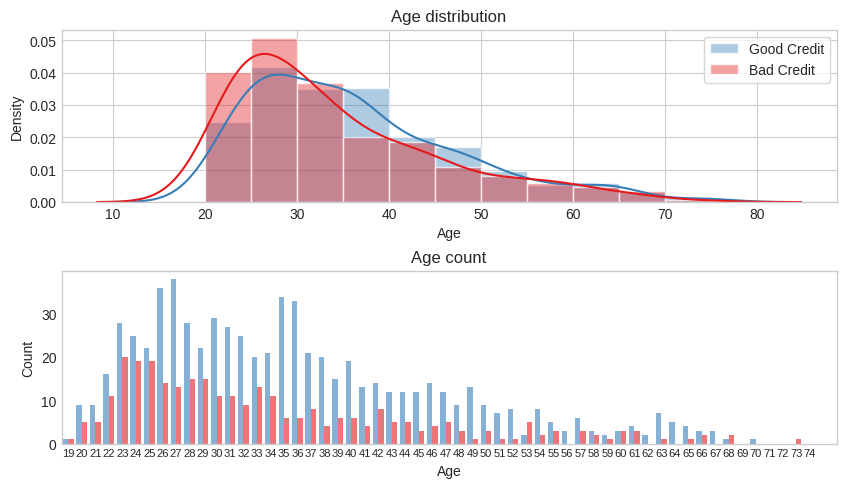

In [14]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 6))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

axs[0].set_title("Age distribution")

sns.histplot(data[data["Risk"] == 1]["Age"], bins=np.linspace(20, 75, num=12), kde=True, kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1,1,1,0.7), color="#377eb8", label="Good Credit", stat="density", ax=axs[0])
sns.histplot(data[data["Risk"] == 0]["Age"], bins=np.linspace(20, 75, num=12), kde=True, kde_kws=dict(cut=3), alpha=0.4, edgecolor=(1,1,1,0.7), color="#e41a1c", label="Bad Credit", stat="density", ax=axs[0])

axs[0].legend(frameon=True)

axs[1].set_title("Age count")

axs[1].grid()
axs[1].hist(data[data["Risk"] == 1]["Age"], bins=np.arange(19, 75) - 0.4, width=0.4, color="#377eb8", alpha=0.6)
axs[1].hist(data[data["Risk"] == 0]["Age"], bins=np.arange(19, 75), width=0.4, color="#e41a1c", alpha=0.6)

axs[1].set_xticks(np.arange(19, 75))
axs[1].set_xlim(18.5, 76)
axs[1].set_xticklabels(np.arange(19, 75), fontsize=8)

axs[1].set_xlabel("Age")
axs[1].set_ylabel("Count")

plt.savefig("plots/age.svg", transparent=True)
plt.show()

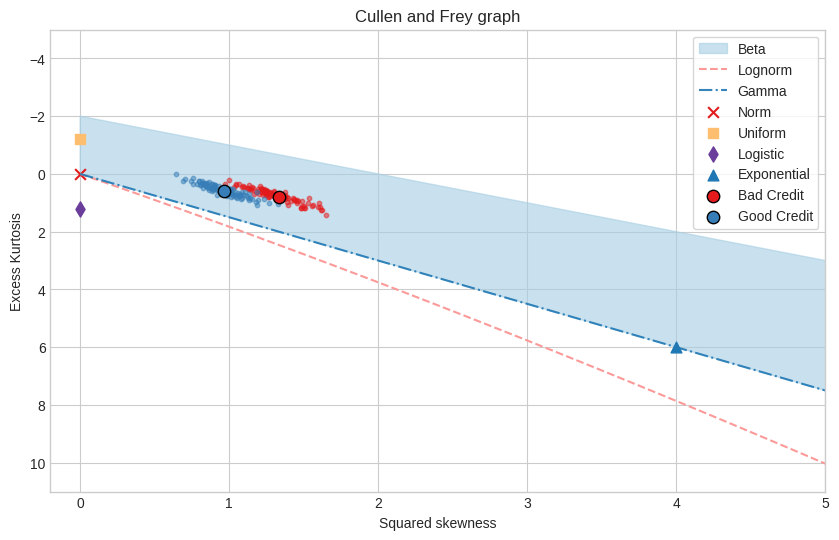

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title("Cullen and Frey graph")

plt.xlabel("Squared skewness")
plt.ylabel("Excess Kurtosis")

log_norm_eps = np.linspace(0, 0.75, num=100)
gamma_eps    = np.linspace(0, 3, num=1000)
beta_eps     = np.linspace(0, 12, num=1000)

norm     = (0, 0)
uniform  = (0, -6/5)
logistic = (0, 6/5)
exponential = (4, 6)

lognorm  = np.array([(np.exp(log_norm_eps**2) + 2)**2 * (np.exp(log_norm_eps**2) - 1), np.exp(4*log_norm_eps**2) + 2*np.exp(3*log_norm_eps**2) + 3*np.exp(2*log_norm_eps**2) - 6])
gamma    = np.array([4*gamma_eps, 6*gamma_eps])

plt.fill_between(beta_eps, beta_eps-2, 3/2*beta_eps, color="#a6cee3", alpha=0.6, label="Beta")
plt.plot(*lognorm, label="Lognorm", linestyle='--', color="#fb9a99")
plt.plot(*gamma, label="Gamma", linestyle='-.', color="#1f78b4", alpha=0.9)
plt.scatter(*norm, label="Norm", marker='x', s=60, color="#e31a1c")
plt.scatter(*uniform, label="Uniform", marker='s', s=60, color="#fdbf6f")
plt.scatter(*logistic, label="Logistic", marker='d', s=60, color="#6a3d9a")
plt.scatter(*exponential, label="Exponential", marker='^', s=60, color="#1f78b4")

distr_bad = data[data["Risk"] == 0]["Age"]

for _ in range(100):
    bs = np.random.choice(distr_bad, size=(1000,))
    plt.scatter(st.skew(bs)**2, st.kurtosis(bs), color="#e41a1c", s=10, alpha=0.5)


distr_good = data[data["Risk"] == 1]["Age"]

for _ in range(100):
    bs = np.random.choice(distr_good, size=(1000,))
    plt.scatter(st.skew(bs)**2, st.kurtosis(bs), color="#377eb8", s=10, alpha=0.5)

plt.scatter(distr_bad.skew()**2, distr_bad.kurtosis(), s=80, color="#e41a1c", label="Bad Credit", edgecolors="black")
plt.scatter(distr_good.skew()**2, distr_good.kurtosis(), s=80, color="#377eb8", label="Good Credit", edgecolors="black")

plt.xlim(-0.2, 5)
plt.ylim(-5, 11)
ax.invert_yaxis()

plt.legend(frameon=True)

plt.savefig('plots/cullen_frey.svg', transparent=True)
plt.show()

/home/danielgardin/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:684: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(1.7187226179283437, 12.435826515679919, 19.55964072609403, 137.851546491708)
(1.844312643440139, 8184274439.793505, 18.910987639777858, 65584828561.71735)


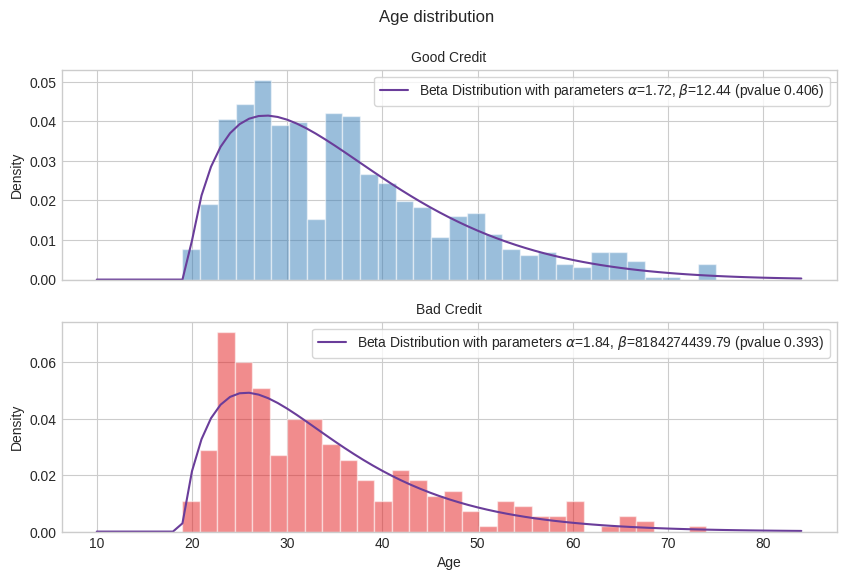

In [16]:
fig, axs = plt.subplots(nrows=2, figsize=(10, 6), sharex=True)

best_b_params = ()
best_b_pvalue = 0

for i in range(100):
    bs = np.random.choice(distr_good, size=(500,))
    
    b_params = st.beta.fit(bs, loc=20, scale=100)

    b_pvalue = st.kstest(distr_good, 'beta', b_params).pvalue
    if b_pvalue > best_b_pvalue:
        best_b_pvalue = b_pvalue
        best_b_params = b_params

print(best_b_params)
axs[0].hist(distr_good, bins=30, color="#377eb8", alpha=0.5, density=True, edgecolor=(1,1,1,1))
axs[0].plot(np.arange(10, 85), st.beta.pdf(np.arange(10, 85), *best_b_params), label=f"Beta Distribution with parameters $\\alpha$={best_b_params[0]:.2f}, $\\beta$={best_b_params[1]:.2f} (pvalue{best_b_pvalue : .3f})", color="#6a3d9a")

best_b_params = ()
best_b_pvalue = 0

for i in range(100):
    bs = np.random.choice(distr_bad, size=(500,))
    
    b_params = st.beta.fit(bs, loc=20, scale=100)

    b_pvalue = st.kstest(distr_bad, 'beta', b_params).pvalue
    if b_pvalue > best_b_pvalue:
        best_b_pvalue = b_pvalue
        best_b_params = b_params


print(best_b_params)
axs[1].hist(distr_bad, bins=30, color="#e41a1c", alpha=0.5, density=True, edgecolor=(1,1,1,1))
axs[1].plot(np.arange(10, 85), st.beta.pdf(np.arange(10, 85), *best_b_params), label=f"Beta Distribution with parameters $\\alpha$={best_b_params[0]:.2f}, $\\beta$={best_b_params[1]:.2f} (pvalue{best_b_pvalue : .3f})", color="#6a3d9a")

axs[0].legend(frameon=True)
axs[1].legend(frameon=True)

fig.suptitle("Age distribution")

axs[0].set_title("Good Credit", fontsize=10)
axs[1].set_title("Bad Credit", fontsize=10)

axs[1].set_xlabel("Age")

axs[0].set_ylabel("Density")
axs[1].set_ylabel("Density")

plt.savefig("plots/age_distribution.svg", transparent=True)
plt.show()